In [2]:
# Importe das bibliotecas utilizadas
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
# Função que calcula a resposta do sistema
def dinamica_pendulo(angulo, angulo_ponto, posicao, posicao_ponto, comprimento, comprimento_massa_polo, massa_polo, massa_total, forca, h):
    
    ret = np.zeros(6)
    
    # Calcula o seno do ângulo do pêndulo
    seno_angulo = np.sin(angulo)
    # Calcula o cosseno do ângulo do pêndulo
    coseno_angulo = np.cos(angulo)
    # Calcula o quadrado do ângulo do pêndulo derivado em relação ao tempo
    angulo_ponto_quadrado = angulo_ponto*angulo_ponto
    # Calcula o ângulo do pêndulo derivado duas vezes em relação ao tempo (aceleração angular)
    aceleracao_angular = (9.8*seno_angulo-(comprimento_massa_polo*angulo_ponto_quadrado*coseno_angulo*seno_angulo/massa_total)-(forca*(coseno_angulo/massa_total)))/(comprimento*(1-massa_polo*coseno_angulo*coseno_angulo/massa_total)) 
    # Calcula a posição do carrinho derivada duas vezes em relação ao tempo (aceleração do carrinho)
    aceleracao = (forca + comprimento_massa_polo*angulo_ponto_quadrado*seno_angulo-comprimento_massa_polo*aceleracao_angular*coseno_angulo)/(massa_total)
    
    # Método de Euler #
    # Calcula a próxima posição do carrinho
    posicao = posicao + posicao_ponto * h
    # Calcula a próxima velocidade do carrinho
    posicao_ponto = posicao_ponto + aceleracao * h
    # Calcula o próximo ângulo do pêndulo
    angulo = angulo + angulo_ponto * h
    # Calcula a próxima velocidade ângular do pêndulo
    angulo_ponto = angulo_ponto + aceleracao_angular * h
    
    # Guarda os valores calculados
    ret[0] = angulo
    ret[1] = angulo_ponto
    ret[2] = aceleracao_angular
    ret[3] = posicao
    ret[4] = posicao_ponto
    ret[5] = aceleracao

    return ret


In [4]:
# Condições iniciais #
# Ângulo do pêndulo
angulo = 0.1
# Velocidade ângular do pêndulo
angulo_ponto = 0
# Posição do carrinho
posicao = 0
# Velocidade do carrinho
posicao_ponto = 0
# Força aplicada no carrinho
forca = -10

# Propriedades do sistema #
# Massa do carrinho
massa_carrinho = 1.0
# Massa do pêndulo
massa_polo = 0.1
# Massa do carrinho somada a massa do pêndulo (massa total)
massa_total = massa_carrinho+massa_polo
# Comprimento do pêndulo
comprimento = 1
# Massa do pêndulo vezes o comprimento
comprimento_massa_ponto = massa_polo*comprimento

# Definição do intervalo de tempo #
# Tempo inicial
a = 0
# Tempo final
b = 10

# Quantidade de valores no intervalo #
# Tamanho do passo
h = 0.005
# Calcula o intervalo
t = np.arange(a, b, h)


In [5]:
# Resposta do sistema #
# Define o vetor que conterá as respostas do sistema
res = np.zeros((len(t), 6))

# Inicia o loop para o calculo da resposta
for i in range(len(t)):

    # Chama a função que calcula a resposta
    res[i] = dinamica_pendulo(angulo,angulo_ponto,posicao,posicao_ponto,comprimento,comprimento_massa_ponto,massa_polo,massa_total,forca,h)
    
    # Guarda os valores para as próximas iterações
    angulo = res[i][0]
    angulo_ponto = res[i][1]
    posicao = res[i][3]
    posicao_ponto = res[i][4]

    # forca = 0

    # print(res[i])

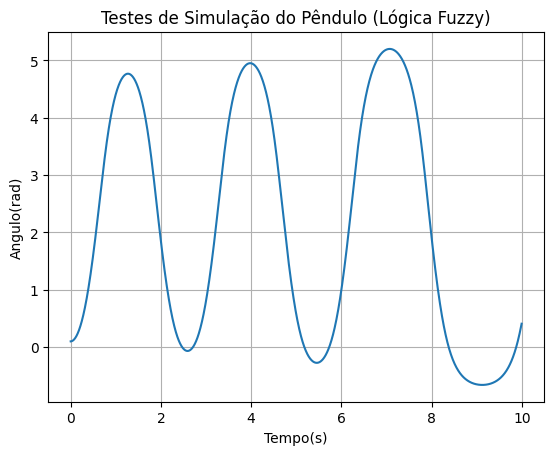

In [6]:
# Plota a resposta do sistema no intervalo de tempo definido
plt.plot(t, res[:,0])
plt.title('Testes de Simulação do Pêndulo (Lógica Fuzzy)')
plt.xlabel('Tempo(s)')
plt.ylabel('Angulo(rad)')
plt.grid(True)
plt.show()


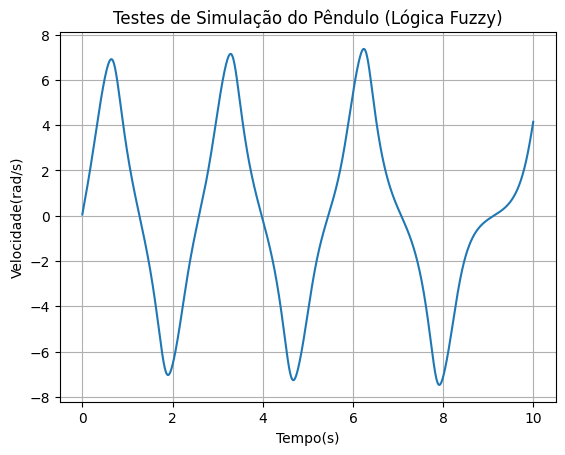

In [7]:
# Plota a resposta do sistema no intervalo de tempo definido
plt.plot(t, res[:,1])
plt.title('Testes de Simulação do Pêndulo (Lógica Fuzzy)')
plt.xlabel('Tempo(s)')
plt.ylabel('Velocidade(rad/s)')
plt.grid(True)
plt.show()

18.137787766123022

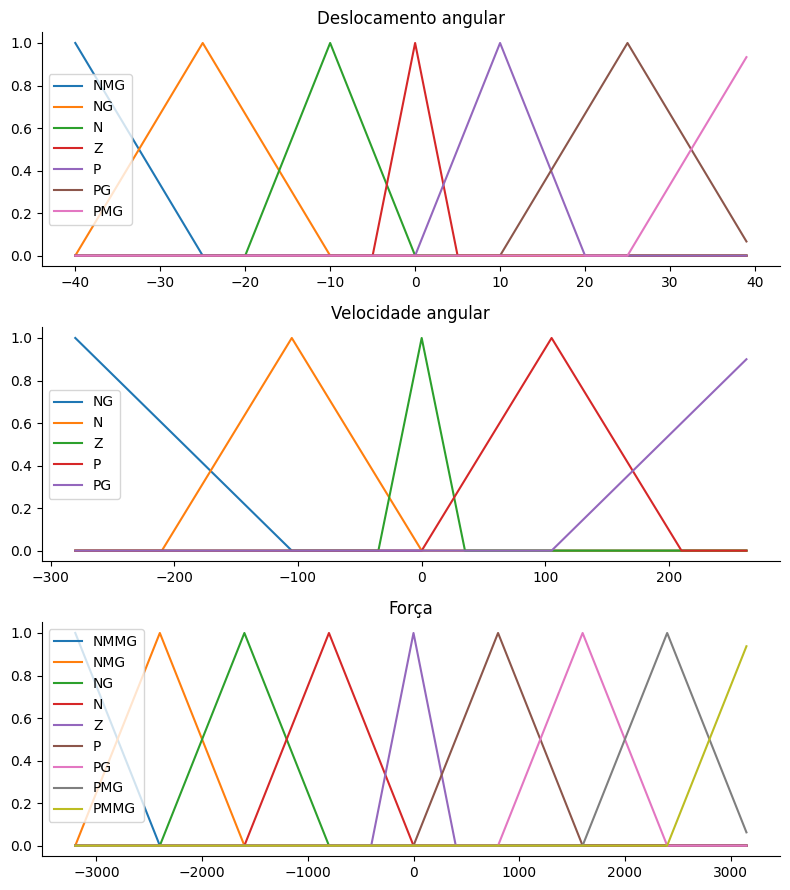

In [8]:
def fuzzyController(theta, theta_ponto, mostra_pertinencia=False):
    
    # Definindo o vetor das variáveis #
    x_angulo = np.arange(-40, 40, 1)
    n_1 = 35
    n_2 = 100
    x_angulo_ponto = np.arange(-8*n_1, 8*n_1, 1*(n_1/2))
    x_forca = np.arange(-32*n_2, 32*n_2, 1*(n_2/2))

    angulo_NMG = fuzz.trimf(x_angulo, [-40, -40, -25])
    angulo_NG = fuzz.trimf(x_angulo, [-40, -25, -10])
    angulo_N = fuzz.trimf(x_angulo, [-20, -10, 0])
    angulo_Z = fuzz.trimf(x_angulo, [-5, 0, 5])
    angulo_P = fuzz.trimf(x_angulo, [0, 10, 20])
    angulo_PG = fuzz.trimf(x_angulo, [10, 25, 40])
    angulo_PMG = fuzz.trimf(x_angulo, [25, 40, 40])

    angulo_ponto_NG = fuzz.trimf(x_angulo_ponto, [-8*n_1, -8*n_1, -3*n_1])
    angulo_ponto_N = fuzz.trimf(x_angulo_ponto, [-6*n_1, -3*n_1, 0*n_1])
    angulo_ponto_Z = fuzz.trimf(x_angulo_ponto, [-1*n_1, 0*n_1, 1*n_1])
    angulo_ponto_P = fuzz.trimf(x_angulo_ponto, [0*n_1, 3*n_1, 6*n_1])
    angulo_ponto_PG = fuzz.trimf(x_angulo_ponto, [3*n_1, 8*n_1, 8*n_1])

    forca_NMMG = fuzz.trimf(x_forca, [-32*n_2, -32*n_2, -24*n_2])
    forca_NMG = fuzz.trimf(x_forca, [-32*n_2, -24*n_2, -16*n_2])
    forca_NG = fuzz.trimf(x_forca, [-24*n_2, -16*n_2, -8*n_2])
    forca_N = fuzz.trimf(x_forca, [-16*n_2, -8*n_2, 0*n_2])
    forca_Z = fuzz.trimf(x_forca, [-4*n_2, 0*n_2, 4*n_2])
    forca_P = fuzz.trimf(x_forca, [0, 8*n_2, 16*n_2])
    forca_PG = fuzz.trimf(x_forca, [8*n_2, 16*n_2, 24*n_2])
    forca_PMG = fuzz.trimf(x_forca, [16*n_2, 24*n_2, 32*n_2])
    forca_PMMG = fuzz.trimf(x_forca, [24*n_2, 32*n_2, 32*n_2])
    
    if mostra_pertinencia==True:
        # Visualizando as fcs de pertinência
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

        ax0.plot(x_angulo, angulo_NMG, linewidth=1.5, label='NMG')
        ax0.plot(x_angulo, angulo_NG, linewidth=1.5, label='NG')
        ax0.plot(x_angulo, angulo_N, linewidth=1.5, label='N')
        ax0.plot(x_angulo, angulo_Z, linewidth=1.5, label='Z')
        ax0.plot(x_angulo, angulo_P, linewidth=1.5, label='P')
        ax0.plot(x_angulo, angulo_PG, linewidth=1.5, label='PG')
        ax0.plot(x_angulo, angulo_PMG, linewidth=1.5, label='PMG')
        ax0.set_title('Deslocamento angular')
        ax0.legend()

        ax1.plot(x_angulo_ponto, angulo_ponto_NG, linewidth=1.5, label='NG')
        ax1.plot(x_angulo_ponto, angulo_ponto_N, linewidth=1.5, label='N')
        ax1.plot(x_angulo_ponto, angulo_ponto_Z, linewidth=1.5, label='Z')
        ax1.plot(x_angulo_ponto, angulo_ponto_P, linewidth=1.5, label='P')
        ax1.plot(x_angulo_ponto, angulo_ponto_PG, linewidth=1.5, label='PG')
        ax1.set_title('Velocidade angular')
        ax1.legend()

        ax2.plot(x_forca, forca_NMMG, linewidth=1.5, label='NMMG')
        ax2.plot(x_forca, forca_NMG, linewidth=1.5, label='NMG')
        ax2.plot(x_forca, forca_NG, linewidth=1.5, label='NG')
        ax2.plot(x_forca, forca_N, linewidth=1.5, label='N')
        ax2.plot(x_forca, forca_Z, linewidth=1.5, label='Z')
        ax2.plot(x_forca, forca_P, linewidth=1.5, label='P')
        ax2.plot(x_forca, forca_PG, linewidth=1.5, label='PG')
        ax2.plot(x_forca, forca_PMG, linewidth=1.5, label='PMG')
        ax2.plot(x_forca, forca_PMMG, linewidth=1.5, label='PMMG')
        ax2.set_title('Força')
        ax2.legend()

        # Ocultando os eixos
        for ax in (ax0, ax1, ax2):
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()

        plt.tight_layout()

    # Fuzzificando os valores
    # Fuzzifica o deslocamento ângular
    angulo_level_NMG = fuzz.interp_membership(x_angulo, angulo_NMG, theta)
    angulo_level_NG = fuzz.interp_membership(x_angulo, angulo_NG, theta)
    angulo_level_N = fuzz.interp_membership(x_angulo, angulo_N, theta)
    angulo_level_Z = fuzz.interp_membership(x_angulo, angulo_Z, theta)
    angulo_level_P = fuzz.interp_membership(x_angulo, angulo_P, theta)
    angulo_level_PG = fuzz.interp_membership(x_angulo, angulo_PG, theta)
    angulo_level_PMG = fuzz.interp_membership(x_angulo, angulo_PMG, theta)
    
    # Fuzzifica a velocidade ângular
    angulo_ponto_level_NG = fuzz.interp_membership(x_angulo_ponto, angulo_ponto_NG, theta_ponto)
    angulo_ponto_level_N = fuzz.interp_membership(x_angulo_ponto, angulo_ponto_N, theta_ponto)
    angulo_ponto_level_Z = fuzz.interp_membership(x_angulo_ponto, angulo_ponto_Z, theta_ponto)
    angulo_ponto_level_P = fuzz.interp_membership(x_angulo_ponto, angulo_ponto_P, theta_ponto)
    angulo_ponto_level_PG = fuzz.interp_membership(x_angulo_ponto, angulo_ponto_PG, theta_ponto)
    
    # Define as regras
    ativaforca = []
    ativa_regra1 = np.fmin(angulo_level_PMG, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra1, forca_PMMG))

    ativa_regra2 = np.fmin(angulo_level_PMG, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra2, forca_PMMG))

    ativa_regra3 = np.fmin(angulo_level_PMG, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra3, forca_PMG))

    ativa_regra4 = np.fmin(angulo_level_PMG, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra4, forca_PG))

    ativa_regra5 = np.fmin(angulo_level_PMG, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra5, forca_P))

    ativa_regra6 = np.fmin(angulo_level_PG, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra6, forca_PMMG))

    ativa_regra7 = np.fmin(angulo_level_PG, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra7, forca_PMG))

    ativa_regra8 = np.fmin(angulo_level_PG, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra8, forca_PG))

    ativa_regra9 = np.fmin(angulo_level_PG, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra9, forca_P))

    ativa_regra10 = np.fmin(angulo_level_PG, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra10, forca_Z))

    ativa_regra11 = np.fmin(angulo_level_P, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra11, forca_PMG))

    ativa_regra12 = np.fmin(angulo_level_P, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra12, forca_PG))

    ativa_regra13 = np.fmin(angulo_level_P, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra13, forca_P))

    ativa_regra14 = np.fmin(angulo_level_P, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra14, forca_Z))

    ativa_regra15 = np.fmin(angulo_level_P, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra15, forca_N))

    ativa_regra16 = np.fmin(angulo_level_Z, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra16, forca_PG))

    ativa_regra17 = np.fmin(angulo_level_Z, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra17, forca_P))

    ativa_regra18 = np.fmin(angulo_level_Z, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra18, forca_Z))

    ativa_regra19 = np.fmin(angulo_level_Z, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra19, forca_N))

    ativa_regra20 = np.fmin(angulo_level_Z, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra20, forca_NG))

    ativa_regra21 = np.fmin(angulo_level_N, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra21, forca_P))

    ativa_regra22 = np.fmin(angulo_level_N, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra22, forca_Z))

    ativa_regra23 = np.fmin(angulo_level_N, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra23, forca_N))

    ativa_regra24 = np.fmin(angulo_level_N, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra24, forca_NG))

    ativa_regra25 = np.fmin(angulo_level_N, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra25, forca_NMG))

    ativa_regra26 = np.fmin(angulo_level_NG, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra26, forca_Z))

    ativa_regra27 = np.fmin(angulo_level_NG, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra27, forca_N))

    ativa_regra28 = np.fmin(angulo_level_NG, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra28, forca_NG))

    ativa_regra29 = np.fmin(angulo_level_NG, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra29, forca_NMG))

    ativa_regra30 = np.fmin(angulo_level_NG, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra30, forca_NMMG))

    ativa_regra31 = np.fmin(angulo_level_NMG, angulo_ponto_level_PG)
    ativaforca.append(np.fmin(ativa_regra31, forca_N))

    ativa_regra32 = np.fmin(angulo_level_NMG, angulo_ponto_level_P)
    ativaforca.append(np.fmin(ativa_regra32, forca_NG))

    ativa_regra33 = np.fmin(angulo_level_NMG, angulo_ponto_level_Z)
    ativaforca.append(np.fmin(ativa_regra33, forca_NMG))

    ativa_regra34 = np.fmin(angulo_level_NMG, angulo_ponto_level_N)
    ativaforca.append(np.fmin(ativa_regra34, forca_NMMG))

    ativa_regra35 = np.fmin(angulo_level_NMG, angulo_ponto_level_NG)
    ativaforca.append(np.fmin(ativa_regra35, forca_NMMG))

    # Defuzzificando os valores
    inferencia = np.fmax(ativaforca[33], ativaforca[34])
    for i in range(len(ativaforca)-2):
        
        inferencia = np.fmax(inferencia, ativaforca[i])

    forcafinal = fuzz.defuzz(x_forca, inferencia, 'centroid')

    return forcafinal

fuzzyController(8.19986923e-02, -1.91639088e-01, mostra_pertinencia=True)

In [9]:
# Condições iniciais #
# Ângulo do pêndulo
angulo = -10*(np.pi/180)
# Velocidade ângular do pêndulo
angulo_ponto = 60*(np.pi/180)
# Posição do carrinho
posicao = 0
# Velocidade do carrinho
posicao_ponto = 0
# Força aplicada no carrinho
forca = 0

# Propriedades do sistema #
# Massa do carrinho
massa_carrinho = 1.5
# Massa do pêndulo
massa_polo = 0.5
# Massa do carrinho somada a massa do pêndulo (massa total)
massa_total = massa_carrinho+massa_polo
# Comprimento do pêndulo
comprimento = 2.5
# Massa do pêndulo vezes o comprimento
comprimento_massa_ponto = comprimento*massa_polo

# Definição do intervalo de tempo #
# Tempo inicial
a = 0
# Tempo final
b = 5
# Calcula o tamanho do passo
h = 0.00005
# Calcula o intervalo
t = np.arange(a, b, h)

# Resposta do sistema #
# Define o vetor que conterá as respostas do sistema
res = np.zeros((len(t), 6))

# Inicia o loop para o calculo da resposta
for i in range(len(t)):
    
    if (i%150) == 0:
        forca = fuzzyController(theta=angulo*(180/np.pi), theta_ponto=angulo_ponto*(180/np.pi))

    # Chama a função que calcula a resposta
    res[i] = dinamica_pendulo(angulo,angulo_ponto,posicao,posicao_ponto,comprimento,comprimento_massa_ponto,massa_polo,massa_total,forca,h)
    
    # Guarda os valores para as próximas iterações
    angulo = res[i][0]
    angulo_ponto = res[i][1]
    posicao = res[i][3]
    posicao_ponto = res[i][4]
    forca = 0


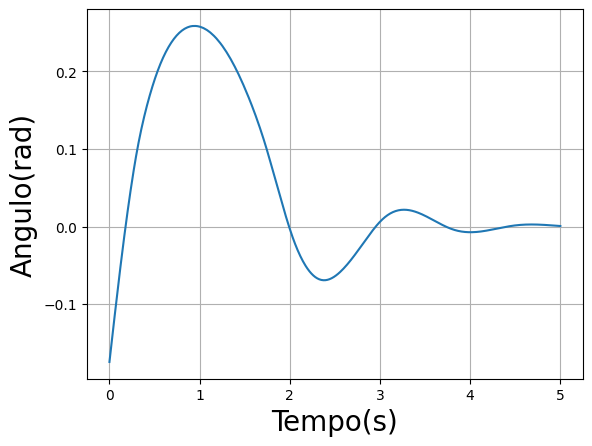

In [10]:
# Plota a resposta do sistema no intervalo de tempo definido
plt.plot(t, res[:,0])
# plt.title('Testes de Simulação do Pêndulo (Lógica Fuzzy)')
plt.xlabel('Tempo(s)', size=20)
plt.ylabel('Angulo(rad)', size=20)
plt.grid(True)
plt.show()